## Segmentación metodo OTSU

El método de Otsu es una técnica automática de segmentación basada en histogramas, desarrollada por Nobuyuki Otsu en 1979. Es altamente utilizada para convertir imágenes en escala de grises a imágenes binarias (blanco y negro). Esto lo logra mediante la determinación automática de un valor umbral óptimo que separa de forma eficiente los píxeles en dos grupos (por ejemplo, texto y fondo).

Este este caso el segmentador se aplicará a un ticket de supermercado, como paso para el preprocesamiento de OCR, ya que para este tipo de reconocimiento es crucial obtener una segmentación clara del texto y del fondo para maximizar el reconocimiento.

Los beneficios que obtendremos al aplicar este segmentaador en nuestra imagen son los siguientes.

**Automatización:** No requiere configuración manual del umbral, lo cual reduce el tiempo y csto del procesamiento. <br>
**Costo computacional bajo:** es un método muy ligero y eficiente, adecuado para sistemas en tiempo real.<br>
**Adaptabilidad:** es eficaz en diferentes condiciones de iluminación homogénea, com oescaneos y fotografias con buena iluminación.<br>

Debemos considerar algunas **limitaciones** al momento de utilizar este segmentador ya que es sencible a ruido externo o iluminación irregular, además debemos de considerar que si la imagen no presenta un contraste suficientemente claro entre el texto y el fondo esté sera poco eficaz.

### Implementación del segmentador OTSU

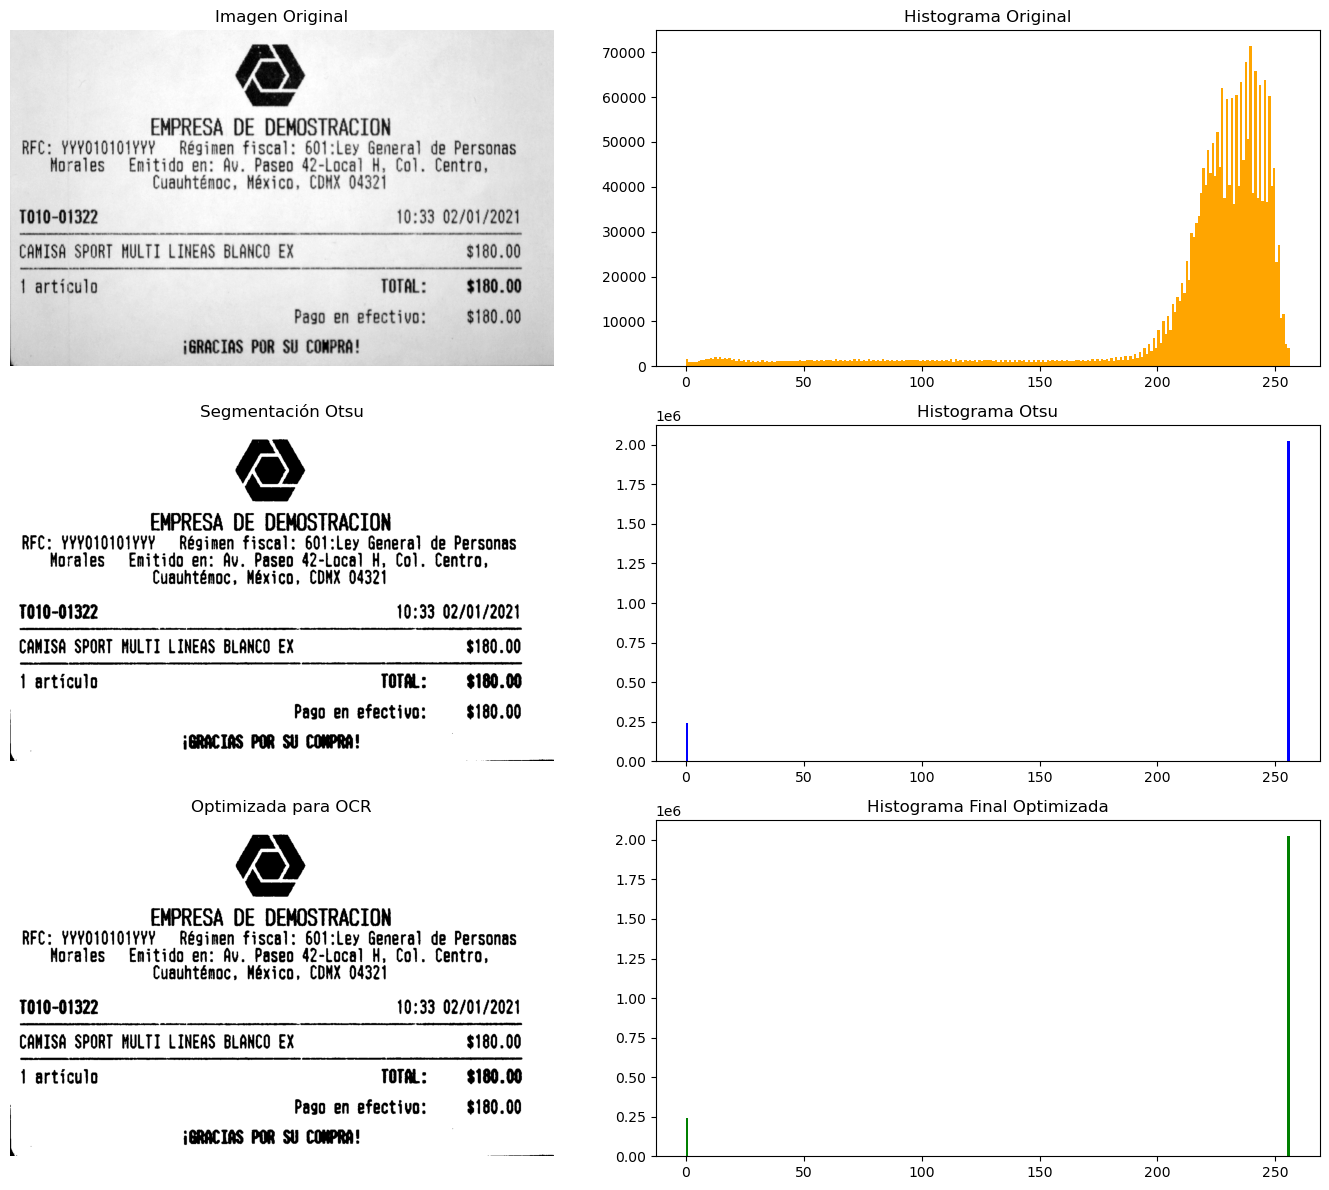

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# Cargar imagen en escala de grises para simplificar el proceso.
img = cv2.imread('ticket.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar filtro gaussiano para reducir ruido
img_filtrada = cv2.GaussianBlur(img, (3,3), 0)

# Aplicar CLAHE para corregir contraste
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_clahe = clahe.apply(img_filtrada)

# Aplicar Otsu, en este caso utilizaremos umbralización binaria + método otsu para el cálculo automático del úmbral óptimp.
_, img_otsu = cv2.threshold(img_clahe, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Postprocesado morfológico, para prevenir caracteres segmentados o iregulares.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img_final = cv2.morphologyEx(img_otsu, cv2.MORPH_CLOSE, kernel)

# Visualización de imágenes y sus histogramas
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Imagen original
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Imagen Original')
axs[0, 0].axis('off')
axs[0, 1].hist(img.ravel(), bins=256, range=(0, 256), color='orange')
axs[0, 1].set_title('Histograma Original')

# Imagen segmentada por Otsu
axs[1, 0].imshow(img_otsu, cmap='gray')
axs[1, 0].set_title('Segmentación Otsu')
axs[1, 0].axis('off')
axs[1, 1].hist(img_otsu.ravel(), bins=256, range=(0, 256), color='blue')
axs[1, 1].set_title('Histograma Otsu')

# Imagen final optimizada
axs[2, 0].imshow(img_final, cmap='gray')
axs[2, 0].set_title('Optimizada para OCR')
axs[2, 0].axis('off')
axs[2, 1].hist(img_final.ravel(), bins=256, range=(0, 256), color='green')
axs[2, 1].set_title('Histograma Final Optimizada')

plt.tight_layout()

### Visualización y análisis

**Histograma de imágen Original**
En el **histograma** muestra una distribución de intensidades amplia, mayormente hacia los tonos claros, lo que es común en imágenes de tickets con texto negro sobre fondo claro.

**Histograma de imágen con segmentador Otsu**
En este **histograma** podemos ver una clara separación binaria: entre valores cercanos a 0 (negro) y 255 (blanco).

**Histograma de la imágen optimizada**
En este **histograma** podemos el resultado similar al segmentador otsu, solo que con algunas mejoras al aplicar los filtros.

### Conclusión

Resultado de la aplicación del **segmentador otsu** podemos decir que es una herramienta simple, eficiente y poderosa para la preparación de imágenes orientadas a reconocimiento óptico de caracteres, especialmente cuando se trabaja con documentos como tickets, recibos, formularios escaneados o cualquier imagen con texto oscuro sobre un fondo claro. además como lo observamos en el preprocesamiento al aplicar el filtro gausiano y e metodo CLAHE para suavizar y mejorar el contraste en áreas desiguales maximizo el resultado obtenido.

En conclusión el segmentador OTSU logro separar de forma efectiva el texto del fondo sin necesidad de configurar manualmente un umbral. Esto lo hace extremadamente útil para entornos de producción y automatización, el histograma de la imágen a la que se aplico el segmentador mostró un comportamiento bimodal ideal, lo que confirma que la técnica es especialmente efectiva cuando el texto y el fondo tienen niveles de intensidad bien diferenciados además la aplicación de

## Segmentación metodo Wathershed

La segmentación de imágenes es una tarea fundamental de la **visión artificial** que implica dividir una imagen en regiones significativas y semánticamente homogéneas. El objetivo es simplificar la representación de una imagen o hacerla más significativa para su posterior análisis. Estos segmentos suelen corresponder a objetos o regiones de interés dentro de la imagen.<br>

Este metodo se utiliza para segmentar imágenes con objetos en contacto o superpuestos. Es ideal en escenarios con objetos de forma irregular, con requisitos de segmentación basada en gradientes y cuando la segmentación guiada por marcadores es viable.

Para la aplicación de este metodo utilizaremos **OpenCV** es una biblioteca de software de código abierto para visión artificial y aprendizaje automático. Contiene cientos de algoritmos de visión artificial, incluyendo detección de objetos, reconocimiento facial, procesamiento de imágenes y aprendizaje automático.


### Implementación de Watersheld

In [ ]:
#Cargamos imagen original, y convertimos a escala de grises
imagen = cv2.imread('maiz.jpg')
image_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

In [ ]:
# Filtro de suavizado
# Aplicamos un filtro Gaussiano para reducir el ruido. Esto evita que el algoritmo de umbral o segmentación detecte detalles irrelevantes
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [ ]:
# Umbral usando Otsu debemos de estar pendientes ya que si tuvieramos el fondo claro o resaltado tendriamos que usar cv2.THRESH_BINARY_INV
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [ ]:
# Transformada de distancia
#Esta operación calcula, para cada píxel blanco (Maíz), la distancia al píxel negro más cercano (borde)

distance = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# Encontrar picos locales
# Estos puntos serán los semilleros o marcadores para el algoritmo Watershed. Es decir, le decimos “aquí hay un objeto, empieza a crecer desde aquí”.

coordinates = peak_local_max(distance, min_distance=5, labels=thresh)
local_max = np.zeros_like(distance, dtype=bool)
local_max[tuple(coordinates.T)] = True

# Etiquetar marcadores
# Asignamos una etiqueta distinta a cada pico detectado, cada numero representará una región diferente.

markers, _ = ndi.label(local_max)

In [ ]:
# Aplicar metodo Watershed

labels = watershed(-distance, markers, mask=thresh)

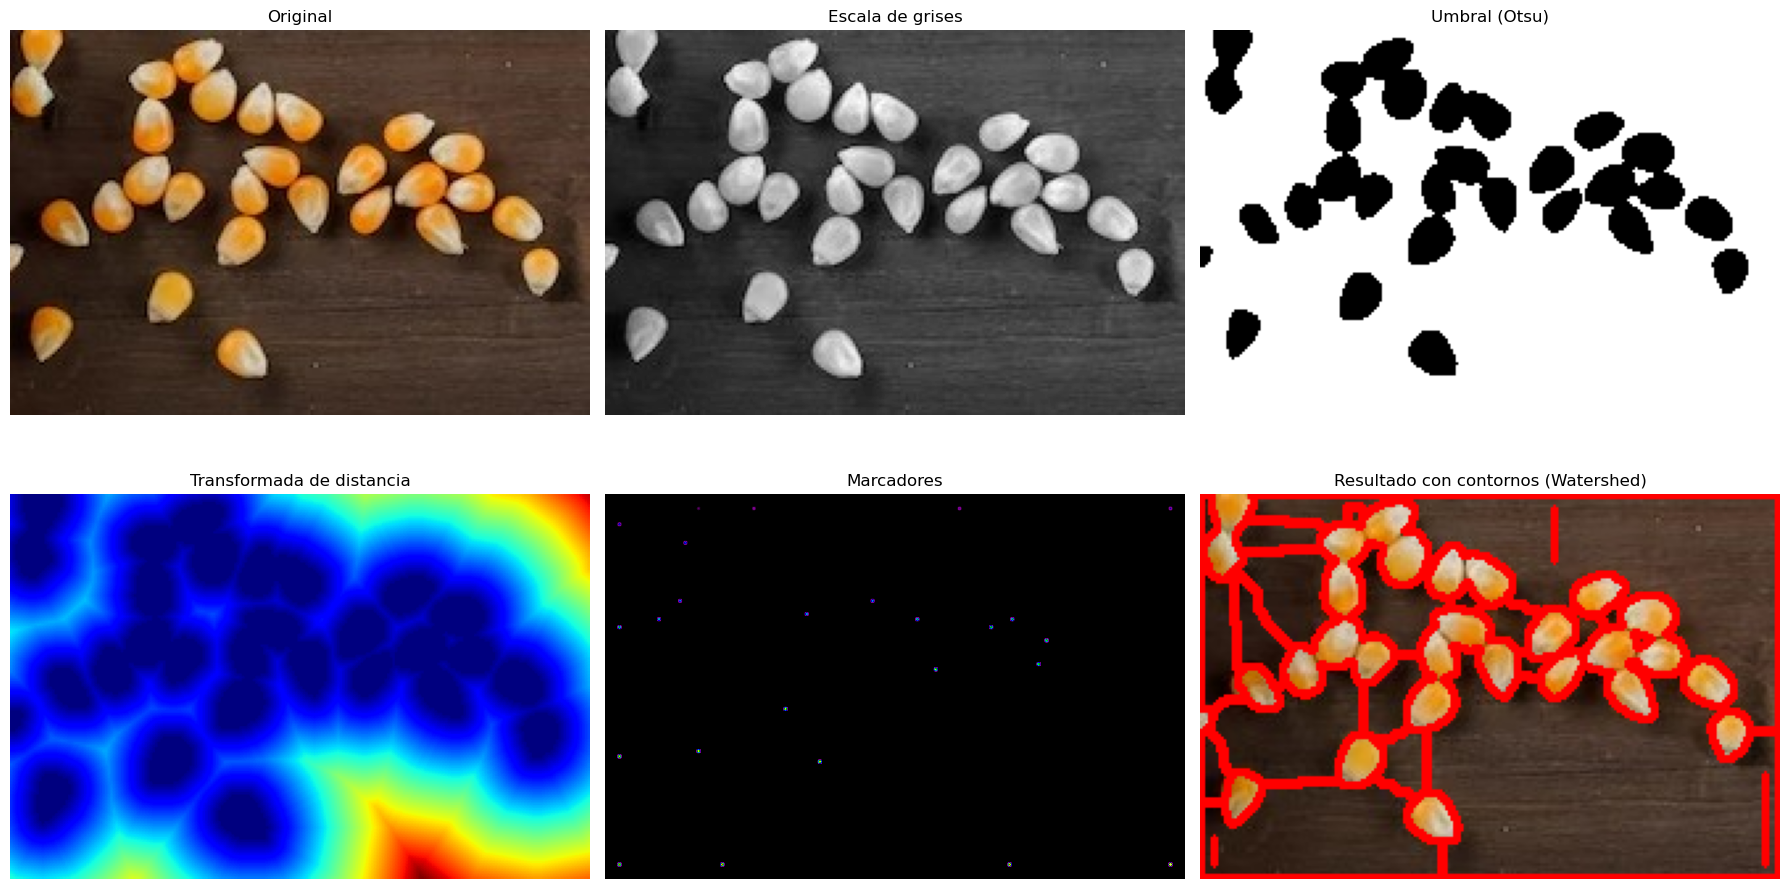

In [ ]:
# Dibujar contornos sobre la imagen original
# Para cada región segmentea se crea una máscara, se detectan sus contornos y la dibujaremos sobre la imágen original.

image_contours = image_rgb.copy()
for label in np.unique(labels):
    if label == 0:
        continue
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(image_contours, contours, -1, (255, 0, 0), 2)  # Azul

# Mostrar resultados
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

axes[0].imshow(image_rgb)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Escala de grises")
axes[1].axis('off')

axes[2].imshow(thresh, cmap='gray')
axes[2].set_title("Umbral (Otsu)")
axes[2].axis('off')

axes[3].imshow(distance, cmap='jet')
axes[3].set_title("Transformada de distancia")
axes[3].axis('off')

axes[4].imshow(markers, cmap='nipy_spectral')
axes[4].set_title("Marcadores")
axes[4].axis('off')

axes[5].imshow(image_contours)
axes[5].set_title("Resultado con contornos (Watershed)")
axes[5].axis('off')

plt.tight_layout()
plt.show()

### Visualización y análisis

1. En la imagen podemos observar algunos granos de máiz que resaltan del fondo, por lo que la imagen presenta condicions favorables para la binarización e implementación del metodo watersheld.
2. En esta transformación cada píxel se representa por su brillo.
3. El umbral binario convirtió el fondo negro en blanco, y los granos de maíz en negro.
4. Aquí cada píxel dentro del maíz representa su distancia al borde más cercano, esto es **clave** para detectar granos que esten juntos o que se tocan ligeramente, mientras más elejados estén sus centros, mejor separads estarán.
5. Se detectaron los puntos más altos de la transformada, cada punto se convierte en un marcador diferente, algunos granos estan muy pegados, por lo que se interpreta que es una sola región.
6. Desde cada marcador, el algoritmo empieza a "crecer", donde 2 regiones se encuentran, se traza un borde, el resultado es un mapa segmentado.



### Conclusión

El método funcionó relativamente bien para la imagen seleccionada, gracias al fondo limpio y buena iluminación, algunos granos se encuentran muy juntos por lo que esto impidio que el modelo funcionara al 100%, El **algoritmo Watershed** es ideal para segmentar objetos con bordes suaves o que se superponen parcialmente.